# Addis Ababa University

## Longitudinal Data Analysis

### By Degarege Nibret Ayalew

#### Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import Exchangeable
from statsmodels.regression.mixed_linear_model import MixedLM
from statsmodels.formula.api import mixedlm

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Reading  of dataset

In [3]:
# reading  dataset
data = pd.read_stata("D:\\AAU PHDS\\Semister Three\\Advanced Biostastics\\Prof Alemayehu Worku\\Assignment\\framingham_study_data_for LDA_selected var.dta")  
data

,randid,sex,totchol,age,cigpday,bmi,prevchd,sysbp1,diabetes1,sysbp2,diabetes2,sysbp3,diabetes3
0,865584,1,203.0,67,0.0,15.54,0,122.0,0,140.0,0.0,134.0,0.0
1,1791264,2,167.0,59,15.0,15.96,0,156.0,0,NaN,NaN,NaN,NaN
2,7529032,2,184.0,37,0.0,16.48,0,137.5,0,172.0,0.0,162.0,0.0
3,1196729,1,193.0,64,0.0,16.59,0,114.0,0,107.0,0.0,125.0,0.0
4,7275609,2,254.0,52,20.0,16.59,0,114.0,0,141.0,0.0,148.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,2687577,2,195.0,47,0.0,NaN,0,126.0,0,NaN,NaN,NaN,NaN
4430,2668575,2,221.0,64,3.0,NaN,0,148.0,0,NaN,NaN,NaN,NaN
4431,3703116,2,164.0,40,0.0,NaN,0,135.0,0,144.5,0.0,137.0,0.0
4432,4837467,2,244.0,58,1.0,NaN,0,160.5,0,160.0,0.0,160.0,0.0


#### Exlporatory data analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4434 entries, 0 to 4433
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   randid     4434 non-null   int32  
 1   sex        4434 non-null   int8   
 2   totchol    4382 non-null   float64
 3   age        4434 non-null   int8   
 4   cigpday    4402 non-null   float64
 5   bmi        4415 non-null   float32
 6   prevchd    4434 non-null   int8   
 7   sysbp1     4434 non-null   float32
 8   diabetes1  4434 non-null   int8   
 9   sysbp2     3930 non-null   float32
 10  diabetes2  3930 non-null   float64
 11  sysbp3     3263 non-null   float32
 12  diabetes3  3263 non-null   float64
dtypes: float32(4), float64(4), int32(1), int8(4)
memory usage: 242.6 KB


In [5]:
data.describe()

,randid,sex,totchol,age,cigpday,bmi,prevchd,sysbp1,diabetes1,sysbp2,diabetes2,sysbp3,diabetes3
count,4.434000e+03,4434.000000,4382.000000,4434.000000,4402.000000,4415.000000,4434.000000,4434.000000,4434.000000,3930.000000,3930.000000,3263.000000,3263.000000
mean,4.987278e+06,1.561570,236.984254,49.925801,8.966379,25.846161,0.043753,132.907761,0.027289,136.947449,0.039440,140.215759,0.077842
std,2.903549e+06,0.496251,44.651098,8.676929,11.931706,4.101821,0.204568,22.421597,0.162943,22.544230,0.194665,22.927641,0.267965
min,2.448000e+03,1.000000,107.000000,32.000000,0.000000,15.540000,0.000000,83.500000,0.000000,88.000000,0.000000,86.000000,0.000000
25%,2.440336e+06,1.000000,206.000000,42.000000,0.000000,23.090000,0.000000,117.500000,0.000000,120.625000,0.000000,123.000000,0.000000
50%,4.972848e+06,2.000000,234.000000,49.000000,0.000000,25.450001,0.000000,129.000000,0.000000,133.000000,0.000000,137.000000,0.000000
75%,7.463577e+06,2.000000,264.000000,57.000000,20.000000,28.090000,0.000000,144.000000,0.000000,150.000000,0.000000,154.000000,0.000000
max,9.999312e+06,2.000000,696.000000,70.000000,70.000000,56.799999,1.000000,295.000000,1.000000,282.000000,1.000000,267.000000,1.000000


#### checking of Missing Values

In [6]:
# checking of Missing Values
data.isnull().sum()

randid          0
sex             0
totchol        52
age             0
cigpday        32
bmi            19
prevchd         0
sysbp1          0
diabetes1       0
sysbp2        504
diabetes2     504
sysbp3       1171
diabetes3    1171
dtype: int64

#### Reshaping the dataset to long format for sysbp and diabetes variables

In [7]:
# Reshaping the dataset to long format for sysbp and diabetes variables
long_format = pd.wide_to_long(
    data,
    stubnames=["sysbp", "diabetes"],
    i="randid",
    j="time",
    sep="",
    suffix="\d+"
).reset_index()

# Displaying the first few rows of the reshaped dataset
long_format

,randid,time,totchol,prevchd,bmi,cigpday,sex,age,sysbp,diabetes
0,865584,1,203.0,0,15.54,0.0,1,67,122.0,0.0
1,1791264,1,167.0,0,15.96,15.0,2,59,156.0,0.0
2,7529032,1,184.0,0,16.48,0.0,2,37,137.5,0.0
3,1196729,1,193.0,0,16.59,0.0,1,64,114.0,0.0
4,7275609,1,254.0,0,16.59,20.0,2,52,114.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13297,2687577,3,195.0,0,NaN,0.0,2,47,NaN,NaN
13298,2668575,3,221.0,0,NaN,3.0,2,64,NaN,NaN
13299,3703116,3,164.0,0,NaN,0.0,2,40,137.0,0.0
13300,4837467,3,244.0,0,NaN,1.0,2,58,160.0,0.0


#### Impute Missing Values with Last Observation Carried Forward (LOCF) method

In [8]:
# Perform Last Observation Carried Forward (LOCF) imputation
df = long_format.ffill()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13302 entries, 0 to 13301
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   randid    13302 non-null  int32  
 1   time      13302 non-null  int64  
 2   totchol   13302 non-null  float64
 3   prevchd   13302 non-null  int8   
 4   bmi       13302 non-null  float32
 5   cigpday   13302 non-null  float64
 6   sex       13302 non-null  int8   
 7   age       13302 non-null  int8   
 8   sysbp     13302 non-null  float32
 9   diabetes  13302 non-null  float64
dtypes: float32(2), float64(3), int32(1), int64(1), int8(3)
memory usage: 610.7 KB


#### Compute the correlation matrix

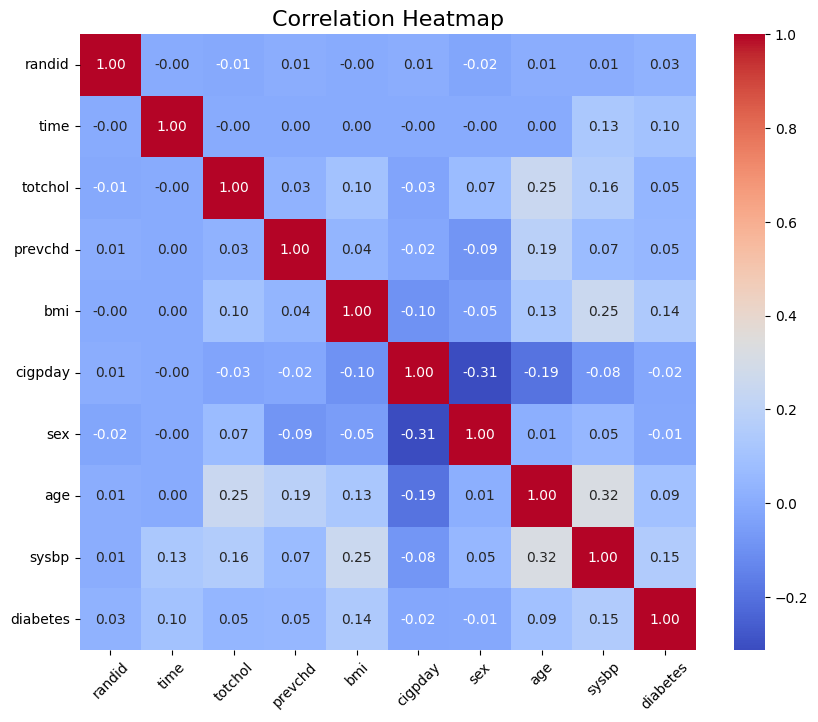

In [10]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add titles and labels
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10, rotation=0)

# Show the plot
plt.show()

#### checking of outliers with boxplot

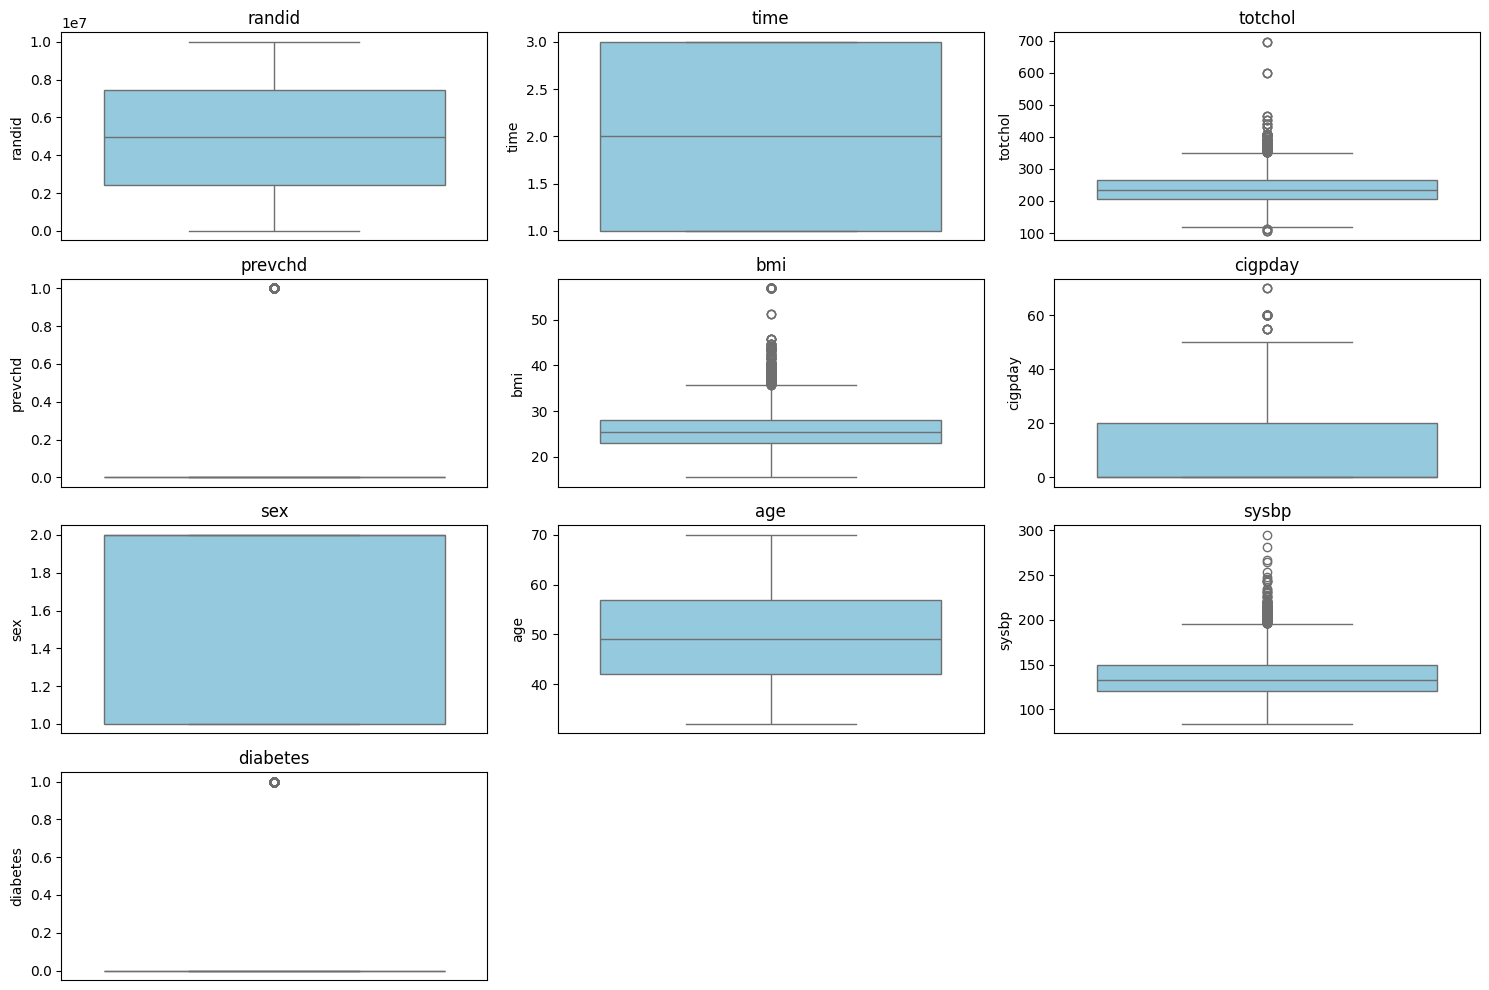

In [11]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create boxplots for each column
for i, column in enumerate(df.columns):
    plt.subplot(len(df.columns) // 3 + 1, 3, i + 1)  # Adjust the grid size based on the number of columns
    sns.boxplot(data=df[column], color="skyblue")
    plt.title(column, fontsize=12)
    plt.xticks([])  # Remove x-ticks for cleaner visualization
    plt.tight_layout()

# Show the plot
plt.show()

#### standardize variables with outliers

In [12]:
from sklearn.preprocessing import RobustScaler

# Columns to keep as-is
columns_to_keep = ['randid', 'age', 'sex', 'time', 'diabetes', 'prevchd']

# Columns to scale
columns_to_scale = ['sysbp', 'totchol', 'cigpday', 'bmi']


# Ensure all required columns exist in the DataFrame
missing_scale_columns = [col for col in columns_to_scale if col not in df.columns]
missing_keep_columns = [col for col in columns_to_keep if col not in df.columns]

if missing_scale_columns or missing_keep_columns:
    raise KeyError(
        f"Missing columns: {missing_scale_columns + missing_keep_columns}"
    )


scaler = RobustScaler()
scaled_data = scaler.fit_transform(df[columns_to_scale])


# Create a DataFrame for the scaled columns
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=df.index)

# Keep the non-scaled columns
non_scaled_df = df[columns_to_keep]

# Combine the scaled and non-scaled DataFrames
df_final = pd.concat([non_scaled_df, scaled_df], axis=1)

df_final = df
df

,randid,time,totchol,prevchd,bmi,cigpday,sex,age,sysbp,diabetes
0,865584,1,203.0,0,15.540000,0.0,1,67,122.0,0.0
1,1791264,1,167.0,0,15.960000,15.0,2,59,156.0,0.0
2,7529032,1,184.0,0,16.480000,0.0,2,37,137.5,0.0
3,1196729,1,193.0,0,16.590000,0.0,1,64,114.0,0.0
4,7275609,1,254.0,0,16.590000,20.0,2,52,114.0,0.0
...,...,...,...,...,...,...,...,...,...,...
13297,2687577,3,195.0,0,56.799999,0.0,2,47,124.0,0.0
13298,2668575,3,221.0,0,56.799999,3.0,2,64,124.0,0.0
13299,3703116,3,164.0,0,56.799999,0.0,2,40,137.0,0.0
13300,4837467,3,244.0,0,56.799999,1.0,2,58,160.0,0.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13302 entries, 0 to 13301
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   randid    13302 non-null  int32  
 1   time      13302 non-null  int64  
 2   totchol   13302 non-null  float64
 3   prevchd   13302 non-null  int8   
 4   bmi       13302 non-null  float32
 5   cigpday   13302 non-null  float64
 6   sex       13302 non-null  int8   
 7   age       13302 non-null  int8   
 8   sysbp     13302 non-null  float32
 9   diabetes  13302 non-null  float64
dtypes: float32(2), float64(3), int32(1), int64(1), int8(3)
memory usage: 610.7 KB


In [14]:
df.describe()

,randid,time,totchol,prevchd,bmi,cigpday,sex,age,sysbp,diabetes
count,1.330200e+04,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000,13302.000000
mean,4.987278e+06,2.000000,236.984664,0.043753,25.978800,8.983085,1.561570,49.925801,136.682526,0.050218
std,2.903331e+06,0.816527,44.582339,0.204552,4.564944,11.949821,0.496213,8.676277,22.779415,0.218403
min,2.448000e+03,1.000000,107.000000,0.000000,15.540000,0.000000,1.000000,32.000000,83.500000,0.000000
25%,2.439832e+06,1.000000,206.000000,0.000000,23.090000,0.000000,1.000000,42.000000,120.000000,0.000000
50%,4.972848e+06,2.000000,234.000000,0.000000,25.459999,0.000000,2.000000,49.000000,133.000000,0.000000
75%,7.463712e+06,3.000000,264.000000,0.000000,28.139999,20.000000,2.000000,57.000000,150.000000,0.000000
max,9.999312e+06,3.000000,696.000000,1.000000,56.799999,70.000000,2.000000,70.000000,295.000000,1.000000


In [15]:
df['diabetes'].value_counts()

diabetes
0.0    12634
1.0      668
Name: count, dtype: int64

#### 1. Individual response profiles

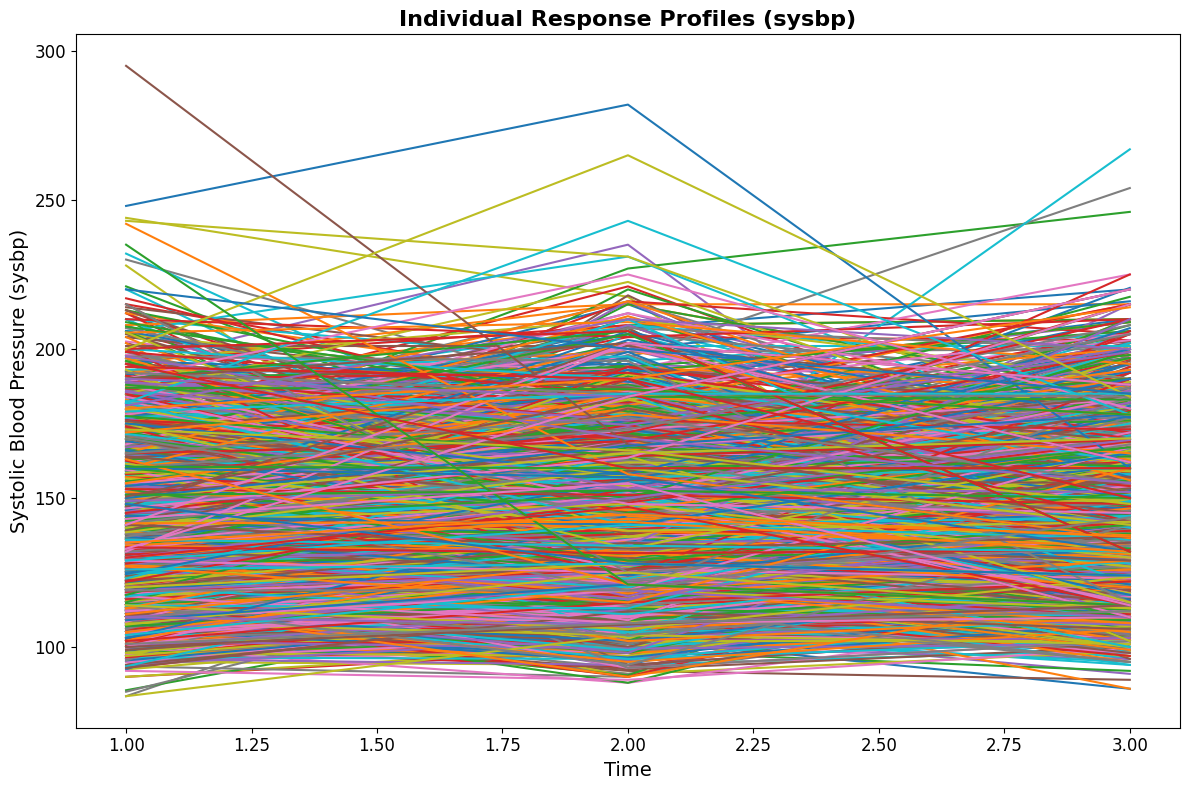

In [16]:
# Set the figure size
plt.figure(figsize=(12, 8))  # Customize the figure size

# Individual response profiles
for id in df['randid'].unique():
    plt.plot(df[df['randid'] == id]['time'], df[df['randid'] == id]['sysbp'], alpha= 1)

# Enhance the plot
plt.title('Individual Response Profiles (sysbp)', fontsize=16, weight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Systolic Blood Pressure (sysbp)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout() 
plt.show()

#### 2. The mean profiles of each sex

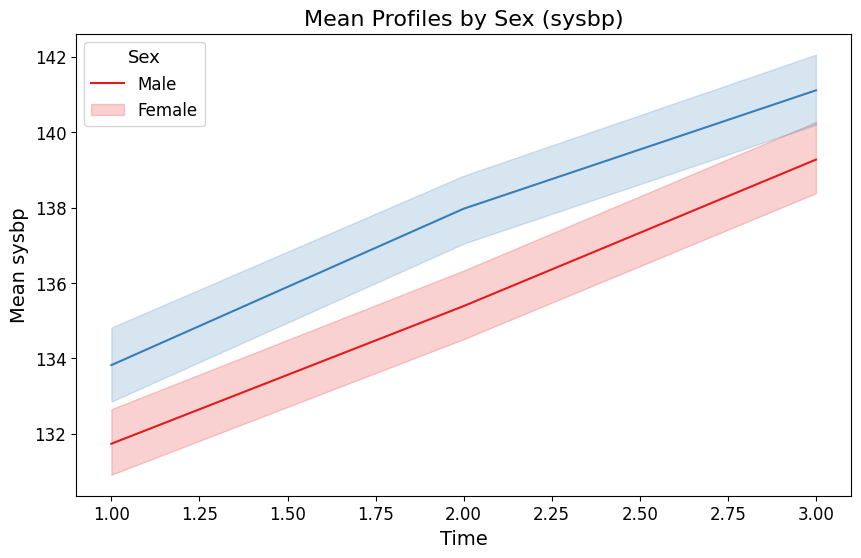

In [17]:
# Ensure the palette has only two colors
palette = sns.color_palette("Set1", 2)  # Generate a palette with exactly 2 colors

# Set the figure size
plt.figure(figsize=(10, 6))

# Plotting the lineplot
sns.lineplot(
    data=df,
    x='time',
    y='sysbp',
    hue='sex',
    palette=palette
)

# Customize the plot
plt.title('Mean Profiles by Sex (sysbp)', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Mean sysbp', fontsize=14)
plt.legend(title='Sex', labels=['Male', 'Female'], fontsize=12, title_fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

#### 3. Random intercept model for Systolic Blood Pressure

In [18]:
# Random intercept model
model_intercept = smf.mixedlm("sysbp ~ sex + totchol + age + bmi + prevchd", df, groups=df["randid"])
result_intercept = model_intercept.fit(reml=False, method='cg', maxiter=10000)

result_intercept.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
          Mixed Linear Model Regression Results
=========================================================
Model:            MixedLM Dependent Variable: sysbp      
No. Observations: 13302   Method:             ML         
No. Groups:       4434    Scale:              250.8278   
Min. group size:  3       Log-Likelihood:     -58218.8202
Max. group size:  3       Converged:          Yes        
Mean group size:  3.0                                    
---------------------------------------------------------
               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept      60.981    2.242 27.200 0.000 56.587 65.375
sex             2.343    0.501  4.673 0.000  1.360  3.325
totchol         0.033    0.006  5.699 0.000  0.021  0.044
age             0.728    0.030 24.243 0.000  0.669  0.787
bmi             1.074    0.055 19.622 0.000  0.967  1.181
prevchd         1.088    1.233  0.882 0.378 -1.329  3.505
Group Var     186.386    0.443                           
=========================================================

"""

#### Random slope model for Systolic Blood Presure

In [19]:
# Random slope model
model_slope = smf.mixedlm("sysbp ~  sex + totchol + age + bmi + prevchd", df, groups=df["randid"], re_formula="~time")

result_slope = model_slope.fit(reml=False, method='cg', maxiter=10000)
result_slope.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
            Mixed Linear Model Regression Results
=============================================================
Model:              MixedLM  Dependent Variable:  sysbp      
No. Observations:   13302    Method:              ML         
No. Groups:         4434     Scale:               189.3895   
Min. group size:    3        Log-Likelihood:      -58071.2555
Max. group size:    3        Converged:           Yes        
Mean group size:    3.0                                      
-------------------------------------------------------------
                  Coef.   Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          59.374    2.264 26.222 0.000 54.936 63.812
sex                 2.366    0.500  4.731 0.000  1.386  3.347
totchol             0.033    0.006  5.828 0.000  0.022  0.045
age                 0.742    0.030 24.639 0.000  0.683  0.801
bmi                 1.087    0.055 19.879 0.000  0.980  1.194
prevchd             1.459    1.233  1.184 0.237 -0.957  3.876
Group Var         393.306    1.847                           
Group x time Cov -108.007    0.691                           
time Var           61.436    0.341                           
=============================================================

"""

#### 5. Compare Models for Systolic Blood Pressure

In [20]:
# 5. Compare Models
print("Random Intercept Model AIC (sysbp):", result_intercept.aic)
print("Random Slope Model AIC (sysbp):", result_slope.aic)

Random Intercept Model AIC (sysbp): 116453.64039259164
Random Slope Model AIC (sysbp): 116162.51091055355


#### 6. GEE Model for sysbp

In [21]:
# 6. GEE Model for sysbp
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.families import Gaussian
from statsmodels.genmod.cov_struct import Exchangeable

# GEE model
gee_model = GEE.from_formula("sysbp ~ sex + totchol + age + bmi + prevchd", groups="randid", data=df, family=Gaussian(), cov_struct=Exchangeable())
gee_result = gee_model.fit()
print(gee_result.summary())

                               GEE Regression Results                              
Dep. Variable:                       sysbp   No. Observations:                13302
Model:                                 GEE   No. clusters:                     4434
Method:                        Generalized   Min. cluster size:                   3
                      Estimating Equations   Max. cluster size:                   3
Family:                           Gaussian   Mean cluster size:                 3.0
Dependence structure:         Exchangeable   Num. iterations:                     2
Date:                     Fri, 24 Jan 2025   Scale:                         437.411
Covariance type:                    robust   Time:                         22:49:29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.9808      2.534     24.062      0.000      56.014      65.948
sex    

#### Random intercept model for diabetes

In [22]:
# Random intercept model for diabetes
model_intercept_diabetes = smf.mixedlm("diabetes ~  sex + totchol + age + bmi + prevchd", df, groups=df["randid"])

result_intercept_diabetes = model_intercept_diabetes.fit(reml=False, method='cg', maxiter=1000)
result_intercept_diabetes.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
=======================================================
Model:            MixedLM Dependent Variable: diabetes 
No. Observations: 13302   Method:             ML       
No. Groups:       4434    Scale:              0.0291   
Min. group size:  3       Log-Likelihood:     2381.0692
Max. group size:  3       Converged:          Yes      
Mean group size:  3.0                                  
-------------------------------------------------------
             Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept    -0.212    0.022 -9.450 0.000 -0.256 -0.168
sex          -0.003    0.005 -0.643 0.520 -0.013  0.007
totchol       0.000    0.000  1.234 0.217 -0.000  0.000
age           0.002    0.000  5.844 0.000  0.001  0.002
bmi           0.006    0.001 11.347 0.000  0.005  0.007
prevchd       0.031    0.012  2.528 0.011  0.007  0.055
Group Var     0.017    0.004                           
=======================================================

"""

#### Random slope model for diabetes

In [23]:
# Random slope model for diabetes
model_slope_diabetes = smf.mixedlm("diabetes ~ sex + totchol + age + bmi + prevchd", df, groups=df["randid"], re_formula="~time")
result_slope_diabetes = model_slope_diabetes.fit(reml=False, method='cg', maxiter=1000)
result_slope_diabetes.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
===========================================================
Model:              MixedLM  Dependent Variable:  diabetes 
No. Observations:   13302    Method:              ML       
No. Groups:         4434     Scale:               0.0180   
Min. group size:    3        Log-Likelihood:      3070.3490
Max. group size:    3        Converged:           Yes      
Mean group size:    3.0                                    
-----------------------------------------------------------
                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept        -0.177    0.021 -8.511 0.000 -0.218 -0.136
sex              -0.003    0.005 -0.589 0.556 -0.012  0.006
totchol           0.000    0.000  0.744 0.457 -0.000  0.000
age               0.002    0.000  6.213 0.000  0.001  0.002
bmi               0.005    0.001  9.228 0.000  0.004  0.006
prevchd           0.031    0.011  2.745 0.006  0.009  0.054
Group Var         0.029    0.016                           
Group x time Cov -0.013    0.007                           
time Var          0.011    0.004                           
===========================================================

"""

#### 9. Compare Models for diabetes

In [24]:
# 9. Compare Models for diabetes
print("Random Intercept Model AIC (diabetes):", result_intercept_diabetes.aic)
print("Random Slope Model AIC (diabetes):", result_slope_diabetes.aic)

Random Intercept Model AIC (diabetes): -4746.13847426635
Random Slope Model AIC (diabetes): -6120.6980156366335


#### 10. GEE Model for diabetes

In [25]:
# 10. GEE Model for diabetes
gee_model_diabetes = GEE.from_formula("diabetes ~ sex + totchol + age + bmi + prevchd", groups="randid", data=df, family=Gaussian(), cov_struct=Exchangeable())
gee_result_diabetes = gee_model_diabetes.fit()
print(gee_result_diabetes.summary())


                               GEE Regression Results                              
Dep. Variable:                    diabetes   No. Observations:                13302
Model:                                 GEE   No. clusters:                     4434
Method:                        Generalized   Min. cluster size:                   3
                      Estimating Equations   Max. cluster size:                   3
Family:                           Gaussian   Mean cluster size:                 3.0
Dependence structure:         Exchangeable   Num. iterations:                     2
Date:                     Fri, 24 Jan 2025   Scale:                           0.046
Covariance type:                    robust   Time:                         22:50:47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2119      0.025     -8.459      0.000      -0.261      -0.163
sex    

## Thank You